# Lumped mass model
his is an example of how to generate and simulate lumped mass models.

In [4]:
import numpy as np
from mh_sise.model_utils import lumped_mass_parameters

N_MASSES = 2

# Example usage
inertia, stiffness, damping = lumped_mass_parameters(
    N=N_MASSES, 
    length=1 * N_MASSES, 
    d_inner=1E-3, 
    d_outer=1.2E-3, 
    density=7850, 
    G=80E9, 
    damping_ratio=0.01, 
    natural_frequency=10
)

print('Mass moment of inertia:', inertia, 'kg·m²')
print('Stiffness coefficient:', stiffness, 'N·m/rad')
print('Damping coefficient:', damping, 'N·m/(rad/s)')

I = inertia * np.ones(N_MASSES)
K = stiffness * np.ones(N_MASSES-1)
C = damping * np.ones(N_MASSES-1)

D = np.zeros(N_MASSES) # friction damping
D[0] = 0.1


Mass moment of inertia: 3.3095736127772373e-09 kg·m²
Stiffness coefficient: 0.008432034682234997 N·m/rad
Damping coefficient: 0.0010851061025499143 N·m/(rad/s)


**Create model**

In [5]:
from mh_sise.model_utils import lumped_mass_ss
from scipy.signal import cont2discrete

# contonuous-time model
Ac, Bc, Cc, Dc = lumped_mass_ss(N_MASSES=N_MASSES, I=I, K=K, C=C, D=D, sensor_loc=0)

# Discrete-time model
ts = 0.001
dsys = cont2discrete((Ac, Bc, Cc, Dc), ts, method='zoh')
Ad, Bd, Cd, Dd, dt_discrete = dsys

**Simualte**

In [7]:
from scipy.signal import dlsim
from mh_sise.model_utils import mexican_hat

###
N_DATA = 1000
###

n_states, n_inputs = np.shape(Bd)
n_outputs = np.shape(Cd)[0]

#initialize signals
u = np.zeros([N_DATA, n_inputs])
u[:,0] = 0.5 * mexican_hat(N_DATA, 20, N_DATA/2)
u[:,1] = mexican_hat(N_DATA, 20, N_DATA/4) + mexican_hat(N_DATA, 20, 3/4*N_DATA)

t, y, x = dlsim((Ad, Bd, Cd, Dd, dt_discrete), u)


**Simulate**

(-1.0, 1.0)

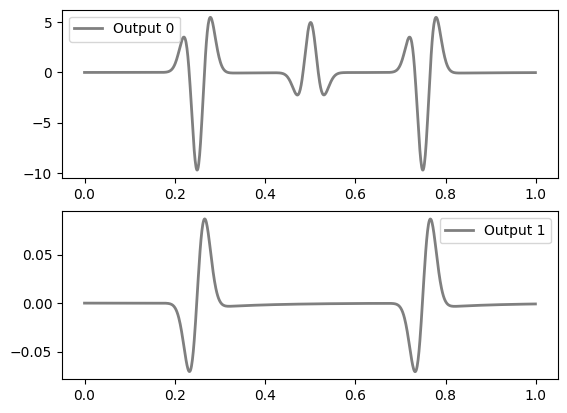

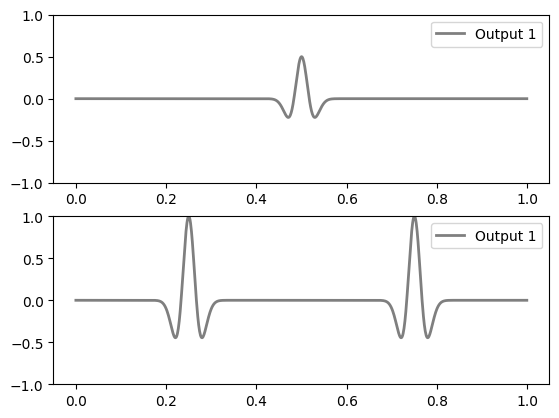

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(n_outputs)
for k in range(n_outputs):
     axs[k].plot(t, y[:,k].T,'k', alpha=0.5, linewidth=2, label=f'Output {k}')
     axs[k].legend()

fig2, axs2 = plt.subplots(2)
axs2[0].plot(t, u[:,0].T,'k', alpha=0.5, linewidth=2, label=f'Output {k}')
axs2[0].set_ylim([-1, 1])
axs2[0].legend()
axs2[1].plot(t, u[:,1].T,'k', alpha=0.5, linewidth=2, label=f'Output {k}')
axs2[1].legend()
axs2[1].set_ylim([-1, 1])
